In [12]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

datadir = 'data/Animals-10/'

#### Summary

The images are preprocessed and saved. There are three different methods of preprocessing:

1. Scaling and losing aspect ratio
2. Scaling, maintaining aspect ratio, and cropping larger dimension
3. Scaling, maintaining aspect ratio, and padding smaller dimension

4. Is there a way to use "smart" scaling?


The issue with padding is that the network has to learn that large spaces of black should be discarded, and these filters would connected to later convolutions.
Comparing models with different scaling methods could shed some light into how much more computation or less accuracy each method leads to.

#### Viewing Some Images

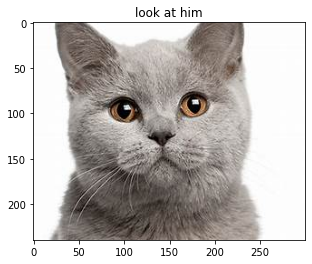

In [12]:
# View an image
cat_369 = np.array(Image.open(datadir + 'cat/369.jpeg'))
plt.imshow(cat_369)
plt.title('look at him')
plt.show()

In [15]:
cat_369.shape

(240, 300, 3)

In [16]:
cat_369[:,0,0]

array([254, 253, 251, 252, 254, 255, 253, 252, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254,
       252, 252, 252, 252, 254, 254, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 254, 254, 252, 252, 252, 252, 254, 254, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 25

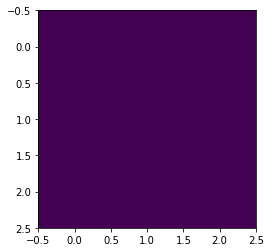

In [18]:
test_img = np.array([[0,0,0], [0,0,0], [0,0,0]])
plt.imshow(test_img)

### Scaling Images

In [14]:
def scale_maintain_ratio(image, new_dim, use_larger=True):
    """
    Scales given image so either larger or smaller dim is of length new_dim,
    maintaining the original aspect ratio.
    """
    width_greater = image.width > image.height
    target_width = (use_larger and width_greater) or (not use_larger and not width_greater)
    new_width = int(new_dim if target_width else image.width * new_dim / image.height)
    new_height = int(image.height * new_dim / image.width if target_width else new_dim)
    resized_image = image.resize((new_width, new_height))
    
    return resized_image

In [48]:
def scale_to_square(image, new_dim, crop=True):
    """
    Scales given image to a square of size dim x dim.
    Either crops larger dim or pads smaller dim.
    """
    width_greater = image.width > image.height
    target_width = (width_greater and not crop) or (not width_greater and crop)
    new_width = int(new_dim if target_width else image.width * new_dim / image.height)
    new_height = int(image.height * new_dim / image.width if target_width else new_dim)
    resized_image = image.resize((new_width, new_height))

    if crop:
        final_image = resized_image.crop((0, 0, new_dim, new_dim))
    else:
        final_image = Image.new(resized_image.mode, (new_dim, new_dim), 0)
        final_image.paste(resized_image, (0, 0))

    return final_image

<class 'PIL.Image.Image'>


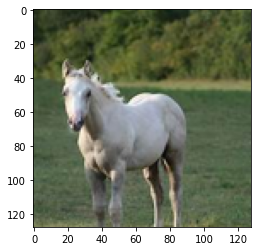

In [37]:
image = Image.open(datadir + 'horse/20.jpeg')
plt.imshow(np.array(scale_to_square(image, 128, True)))

original width, height: 200 300
resized width, height: 85 128
alt resized width, height: 128 192


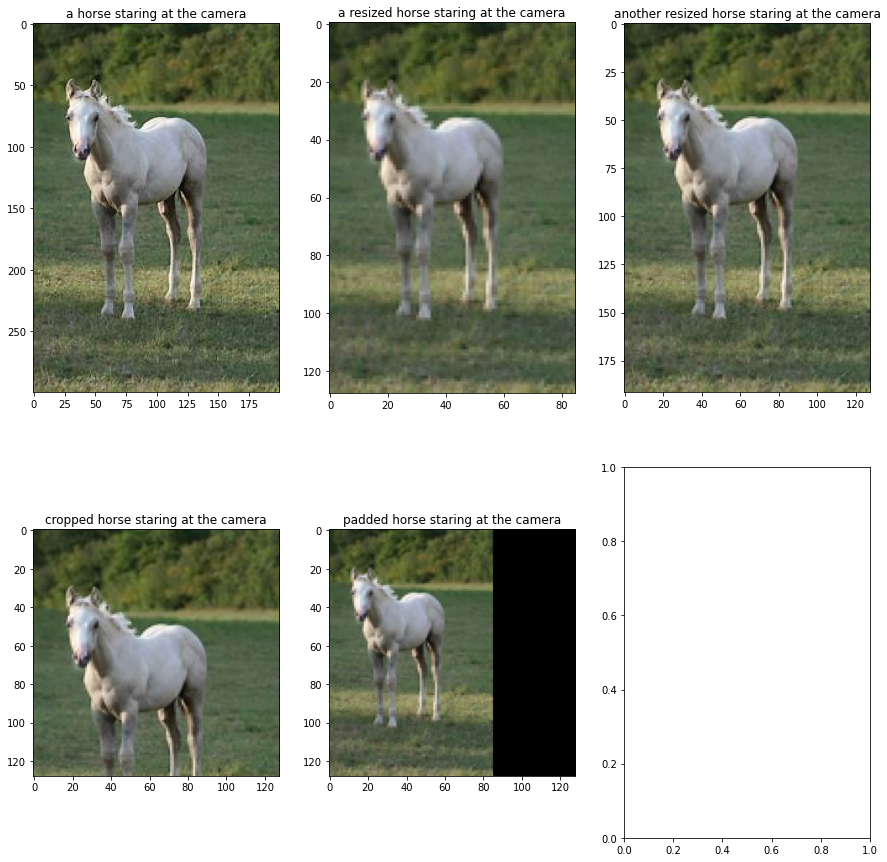

In [55]:
fig, ax = plt.subplots(2,3, figsize=(15,15))
newsize = 128
horse_image = Image.open(datadir + 'horse/20.jpeg')
resized_image = scale_maintain_ratio(horse_image, newsize, True)
alt_resized_image = scale_maintain_ratio(horse_image, newsize, False)
cropped_image = scale_to_square(horse_image, newsize, True)
padded_image = scale_to_square(horse_image, newsize, False)
print('original width, height:', horse_image.width, horse_image.height)
print('resized width, height:', resized_image.width, resized_image.height)
print('alt resized width, height:', alt_resized_image.width, alt_resized_image.height)
ax[0,0].imshow(np.array(horse_image))
ax[0,0].title.set_text('a horse staring at the camera')
ax[0,1].imshow(np.array(resized_image))
ax[0,1].title.set_text('a resized horse staring at the camera')
ax[0,2].imshow(np.array(alt_resized_image))
ax[0,2].title.set_text('another resized horse staring at the camera')
ax[1,0].imshow(np.array(cropped_image))
ax[1,0].title.set_text('cropped horse staring at the camera')
ax[1,1].imshow(np.array(padded_image))
ax[1,1].title.set_text('padded horse staring at the camera')
plt.show()

#### Iterating All Images

Takes about 45 seconds to just open and create NumPy array for all images

In [ ]:
imgHeight = 64
imgWidth = 64

In [14]:
for animal in os.listdir(datadir):
    if not '.' in animal:
        for img in os.listdir(datadir + animal):
            np.array(Image.open(datadir + animal + '/' + img))

### Loading Dataset

In [47]:
# Load all cats
imgsize = 32
cat_dir = datadir + '/cat/'
numcats = len(os.listdir(cat_dir))
allcats = np.zeros((numcats, imgsize, imgsize, 3))
for i, img_name in enumerate(os.listdir(cat_dir)):
    img = Image.open(cat_dir + img_name)
    if not img.mode == 'RGB':
        img = img.convert('RGB')
    allcats[i] = np.array(img.resize((imgsize, imgsize)))

In [120]:
print(numcats, 'cats')
print(sys.getsizeof(allcats) / 2**20, 'Megabytes')
print((1668 * 32 * 32 * 3 * 64) / (2**20 * 8))

1668 cats
39.09388732910156 Megabytes
39.09375


#### Examine Distribution of Image Sizes

Allows finding of maximum effective image size

In [61]:
sizes = {}
for animal in [d for d in os.listdir(datadir) if '.' not in d]:
    sizes[animal] = []
    for img_name in os.listdir(datadir + animal):
        image = Image.open(datadir + animal + '/' + img_name)
        sizes[animal].append((image.size[0], image.size[1]))

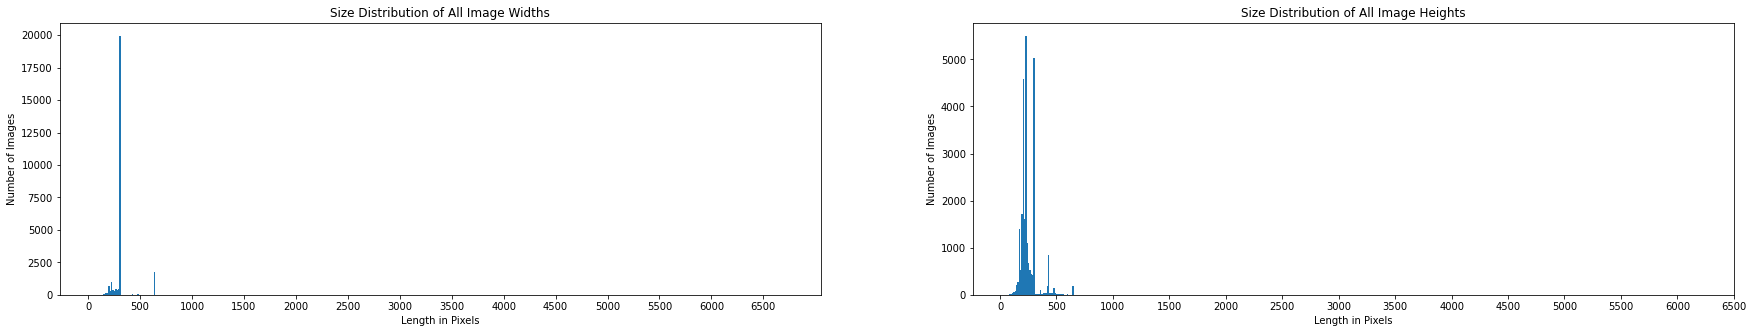

Majority of Images below 500 x 500


In [92]:
fig, ax = plt.subplots(1, 2, figsize=(30, 5))
animal_sizes = sum([sizes[l] for l in sizes], [])
ax[0].hist([s[0] for s in animal_sizes], bins=500)
ax[1].hist([s[1] for s in animal_sizes], bins=500)
ax[0].set_xticks([i for i in range(0, 7000, 500)])
ax[1].set_xticks([i for i in range(0, 7000, 500)])
ax[0].title.set_text('Size Distribution of All Image Widths')
ax[1].title.set_text('Size Distribution of All Image Heights')
ax[0].set_xlabel('Length in Pixels')
ax[1].set_xlabel('Length in Pixels')
ax[0].set_ylabel('Number of Images')
ax[1].set_ylabel('Number of Images')
plt.show()
print('Majority of Images below 500 x 500')

#### How Much Memory Does Largest Useful Image Size Take?

In [129]:
l_imgsize = 500
num_img = sum([len(os.listdir(datadir + anim_dir)) for anim_dir in os.listdir(datadir) if '.' not in anim_dir])
n_gigs = 26179 * 64 * 500 * 500 * 3 / (2**30 * 8)
print(num_img, 'total images')
print('full dataset would take %0.3f gigabytes with a float64 array' % n_gigs)

26179 total images
full dataset would take 146.287 gigabytes with a float64 array


#### Create the Dataset Generator

In [58]:
from random import sample

def create_datasets(train_ratio, valid_ratio, test_ratio):


    all_filenames = []
    for animal in [d for d in os.listdir(datadir) if '.' not in d]:
        for img_name in os.listdir(datadir + animal):
            all_filenames.append(animal + '/' + img_name)

    full_size = len(all_filenames)
    train_size = int(full_size * train_ratio)
    valid_size = int(full_size * valid_ratio)
    test_size = int(full_size * test_ratio)

    train_filenames = sample(all_filenames, train_size)
    all_filenames = [x for x in all_filenames if x not in train_filenames]
    valid_filenames = sample(all_filenames, valid_size)
    all_filenames = [x for x in all_filenames if x not in valid_filenames]
    test_filenames = sample(all_filenames, test_size)

    train_dataset = ImageGenerator(filenames=train_filenames, name='train')
    valid_dataset = ImageGenerator(filenames=valid_filenames, name='valid')
    test_dataset = ImageGenerator(filenames=test_filenames, name='test')

    return train_dataset, valid_dataset, test_dataset

In [59]:
train_dataset, valid_dataset, test_dataset = create_datasets(0.6, 0.2, 0.2)

In [60]:
for i in range(int(0.8*26179)):
    train_dataset.next()

StopIteration: 

In [61]:
print(train_dataset.i)
print(train_dataset.n)
print(train_dataset.choice_time)
print(train_dataset.image_load_time)

15707
15707
0.05001258850097656
3.2365355491638184


In [62]:
for i in range(int(0.8*26179)):
    valid_dataset.next()

StopIteration: 

In [ ]:
print(valid_dataset.i)
print(valid_dataset.n)
print(valid_dataset.choice_time)
print(valid_dataset.image_load_time)

In [ ]:
for i in range(int(0.8*26179)):
    test_dataset.next()

In [ ]:
print(test_dataset.i)
print(test_dataset.n)
print(test_dataset.choice_time)
print(test_dataset.image_load_time)

In [57]:
import os
from random import choice
import numpy as np
from PIL import Image
import time

class_encoding = {'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}

class ImageGenerator():
    """
    animal_n is number of images by animal.
    n is the total number of images.
    image_tracker is a dictionary of boolean arrays of the images read for each animal. True is unread, False is read.
    file_names is the name of the image corresponding to the image tracker. It is sorted to ensure determinism between runs.
    i is the current position of the iterator.
    """    

    def __init__(self, filenames=None, image_dir='data/Animals-10/', name=None):
        self.name = name
        self.image_dir = image_dir
        self.animals = [animal for animal in os.listdir(self.image_dir) if '.' not in animal]
        # self.n_by_animal = {animal: len(os.listdir(self.image_dir + animal)) for animal in os.listdir(self.image_dir) if '.' not in animal}
        # self.n = sum([self.n_by_animal[animal] for animal in self.n_by_animal])

        # self.dataset_tracker = {}

        # self.image_tracker = {animal: [True for _ in range(self.n_by_animal[animal])] for animal in self.animals}
        # self.file_names = {animal: os.listdir(self.image_dir + animal) for animal in self.animals}
        # self.remaining_images = {animal: [i for i in range(self.n_by_animal[animal])] for animal in self.animals}
        if filenames:
            # Dataset has been predetermined by filenames
            # Could also take in a list of available filenames and determine itself.....?
            self.read_tracker = np.array([True for _ in range(len(filenames))])
            self.classes = np.array([class_encoding[f.split('/')[0]] for f in filenames])
            self.filenames = filenames
        else:
            NotImplementedError("Full Dataset Generator Not Yet Implemented.")
            # self.read_tracker = 
            # self.classes = 
            # self.filenames = 

        # Removing used image nums from a list is 240 times faster than iterating True/False list
        self.remaining_image_nums = [i for i in range(len(self.filenames))] 
        self.n = len(self.filenames)
        self.i = 0

        self.image_load_time = 0
        self.choice_time = 0


        # Need two arrays: one describing the images in the dataset, and another describing the ones that have been read so far
        # Would a dictionary take a lot more memory?

    def __iter__(self):
        return self
    
    def __next__(self):
        return self.next()

    def next(self):
        if self.i < self.n:

            # while True:
            #     animal = choice(self.animals)
            #     if len(self.remaining_images[animal]):
            #         break
            # image_num = choice(self.remaining_images[animal])
            # image_name = self.file_names[animal][image_num]

            start = time.time()
            # remaining_image_nums = [i for i, val in enumerate(self.read_tracker) if val]
            image_num = choice(self.remaining_image_nums)
            image_name = self.filenames[image_num]
            self.choice_time += (time.time() - start)
            start = time.time()
            image = Image.open(self.image_dir + image_name)
            self.read_tracker[image_num] = False
            self.remaining_image_nums.remove(image_num)
            if not image.mode == 'RGB':
                image = image.convert('RGB')
            self.image_load_time += (time.time() - start)

            self.i += 1
            # self.image_tracker[animal][image_num] = False
            # self.remaining_images[animal].remove(image_num)
            return np.array(image)

        raise StopIteration()

In [9]:
image_generator = ImageGenerator()
image_generator.n

26179

In [10]:
for i in range(26179):
    try:
        _ = image_generator.next()
    except Exception as e:
        print(i)
        print(type(e))

26179
<class 'StopIteration'>


In [16]:
# Looking at memory usage of large dictionary for keeping track of images\
image_dict = {}
for animal in [d for d in os.listdir(datadir) if '.' not in d]:
    image_dict[animal] = {}
    for img in os.listdir(datadir + animal):
        image_dict[animal][img] = True

In [20]:
sys.getsizeof(image_dict)

368

#### Train, Test, Eval Generators as -------

In [ ]:



# class AllGenerators(ImageGenerator):
#     """
    
#     """

#     def init(self):
        
    

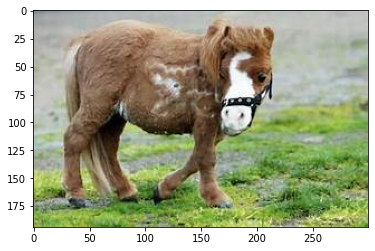

In [167]:
plt.imshow(Image.fromarray(image_generator.next()))

In [159]:
image_generator.remaining_images.keys()

dict_keys(['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel'])

#### Small Experiment: See How Much Ops/Time Taken Using Random Nums to Choose Images Without Replacement

In [155]:
choicelist = [i for i in range(27000)]
chosen = []

useful_queries = 0
useless_queries = 0

for i in range(27000):
    while True:
        x = choice(choicelist)
        if not x in chosen:
            useful_queries += 1
            chosen.append(x)
            break
        useless_queries += 1

In [156]:
useless_queries / useful_queries

11.691777777777778

Only about 11 times the queries, not as bad as I expected